# Signal Network-Enabled Artificial Neural Network Approach for Accurate Water Quality Prediction

This project aims to improve the accuracy of water quality prediction through the integration of signal networking and artificial neural network (ANN) technology. A comprehensive dataset consisting of various water quality parameters is utilized to train an ANN model. The model is designed to take into account the intricate relationships between the different water quality factors and their impact on overall water safety. The signal network plays a crucial role in collecting real-time data from various water sources, which is then fed into the ANN model for prediction. The results from the model are analyzed and compared with traditional methods to determine the efficacy of the proposed approach. The project's outcome is expected to provide a robust, data-driven solution for water quality management, which will help to ensure the safety of water sources and improve overall public health.

### Import Necessary libraries

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

This code is a Python script for implementing a machine learning model for water quality prediction. It uses the following libraries:

* "numpy" for numerical computation
* "pandas" for data manipulation and analysis
* "matplotlib" and "seaborn" for data visualization
* "train_test_split" from "sklearn" for splitting the dataset into training and testing sets
* "tensorflow.keras" for building and training a neural network model
* "accuracy_score", "confusion_matrix", and "classification_report" from "sklearn" for evaluating the model's performance.


The code first loads the water quality dataset using pandas, and then splits it into training and testing sets using "train_test_split". Next, it creates a neural network model using the Sequential class from "tensorflow.keras". The model is then trained on the training data, and its performance is evaluated on the testing data using the metrics from "sklearn". Finally, the results are visualized using "matplotlib" and "seaborn" to gain a deeper understanding of the model's performance.

### Import the dataset

In [2]:
df = pd.read_csv('waterQuality1.csv')

In [3]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


This code loads a water quality dataset from a CSV file using the pandas library. The pandas.read_csv function reads the contents of the file 'waterQuality1.csv' and returns a pandas DataFrame, which is stored in the variable df. The data in this DataFrame can then be used for data analysis, preprocessing, and building a machine learning model for water quality prediction.

### Check info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

This code uses the df.info() method to get a summary of the DataFrame df. This method returns information about the DataFrame's columns, including the data type of each column, the number of non-null values, and the memory usage of each column. This information can be useful for understanding the structure of the dataset, checking for missing or duplicate data, and identifying potential data types that may need to be changed for the purpose of building a machine learning model.





### View countplot of the target column

<Axes: xlabel='count', ylabel='is_safe'>

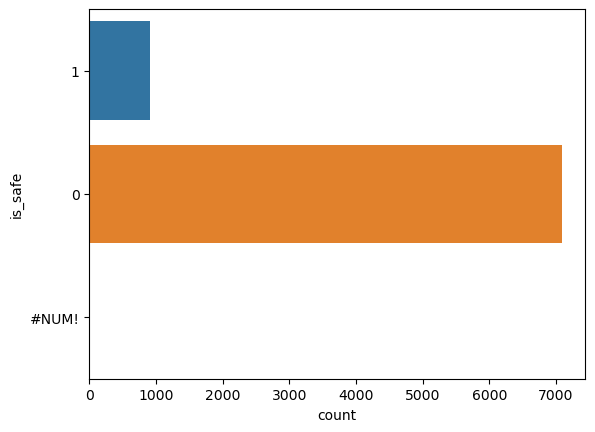

In [5]:
sns.countplot(y = df['is_safe'])

This code creates a bar plot using the seaborn library to visualize the distribution of the target variable "is_safe" in the water quality dataset. The sns.countplot function creates a bar plot where the count of each unique value of the target variable is displayed. The y argument specifies which column in the DataFrame to use as the y-axis data. In this case, df['is_safe'] refers to the "is_safe" column. The resulting bar plot provides an overview of the class balance in the dataset, which can be useful for identifying potential imbalanced class problems in the target variable.

### Check unique values in 'is_safe' column

In [6]:
df['is_safe'].unique()

array(['1', '0', '#NUM!'], dtype=object)

This code returns the unique values in the target variable "is_safe". The df['is_safe'] notation retrieves the "is_safe" column from the pandas DataFrame df, and the .unique() method returns an array of all unique values in that column. This code can be useful for getting a quick overview of the values that the target variable can take, which can help in understanding the problem statement and the type of prediction task that is being performed.

### Remove entries with 'is_safe' value '#NUM!'

In [7]:
rows_to_remove = list(df[df['is_safe'] == '#NUM!'].index)

In [8]:
rows_to_remove

[7551, 7568, 7890]

In [9]:
df.drop(rows_to_remove, inplace = True)

This code removes rows from the water quality dataset that contain the value '#NUM!' in the "is_safe" column. The df[df['is_safe'] == '#NUM!'].index expression returns the indices of all the rows in the DataFrame df where the value in the "is_safe" column is '#NUM!'. The resulting indices are stored in the list rows_to_remove. The code then uses this list to remove the rows from the DataFrame using the df.drop method. This step is necessary because the presence of invalid values in the target variable can affect the performance of the machine learning model. By removing these rows, the data is cleaned and made ready for building a predictive model

### Change the datatype of 'is_safe' & 'ammonia' column

Both of these columns are currently "object" datatype

In [10]:
df['is_safe'] = df['is_safe'].astype('int64')

This code converts the is_safe column in the dataframe df from string data type to integer data type using the astype method. The argument passed to the method, 'int64', specifies the target data type to be 64-bit integer. This conversion is necessary because the target variable is a binary classification label and needs to be numerical for the model to process it.

In [11]:
df['ammonia'] = df['ammonia'].astype('float64')

This code converts the ammonia column in the dataframe df from string data type to floating-point data type using the astype method. The argument passed to the method, 'float64', specifies the target data type to be 64-bit floating point number. This conversion is necessary because the data in this column needs to be in numerical format for the model to process it.

### Plot correlation matrix on a heatmap

<AxesSubplot:>

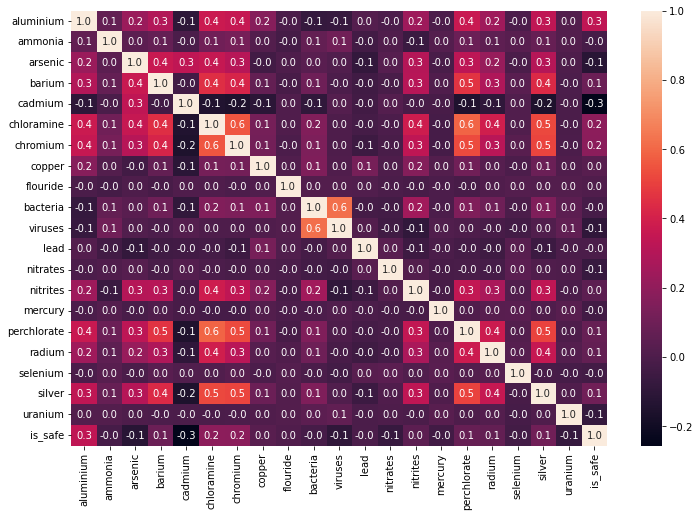

In [143]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, fmt = '.1f')

This code creates a heatmap to visualize the pairwise correlations between all the features in the water quality dataset. The plt.figure function creates a new figure with the specified size. The sns.heatmap function creates the heatmap and displays it in the created figure.

The df.corr() expression calculates the pairwise correlations between all the columns in the pandas DataFrame df. The resulting correlations are passed as the argument to sns.heatmap. The annot argument is set to True to show the correlation values inside each cell of the heatmap. The fmt argument is set to '.1f' to display the correlation values with one decimal place.

The heatmap provides a quick overview of the linear relationships between the features in the dataset. It can be useful in identifying features that are strongly correlated with each other, as well as features that are weakly or not correlated with the target variable. This information can be useful for feature selection, as well as for understanding the underlying relationships in the data.

### Split the dataset into Input & Target Variables)

In [19]:
X = df.drop(columns = ['is_safe'])
y = df['is_safe']

This code creates two pandas DataFrames, X and y, from the water quality dataset.

The df.drop(columns = ['is_safe']) expression creates a new DataFrame X by removing the "is_safe" column from the original df DataFrame. This is done because the "is_safe" column is the target variable, and it will not be used as a feature in the machine learning model.

The df['is_safe'] expression retrieves the "is_safe" column from the original df DataFrame and stores it in a new DataFrame y. The y DataFrame contains the target variable values that the machine learning model will learn to predict.

In this code, X and y are the typical notation used in machine learning to represent the feature matrix and the target vector, respectively. The feature matrix contains the data that the machine learning model uses to make predictions, while the target vector contains the values that the model will learn to predict.

### Feature scale our input variables with StandardScaler

In [20]:
scaler = StandardScaler()

This code creates an instance of the StandardScaler class from the sklearn.preprocessing module. The StandardScaler class is used to transform the feature matrix X such that it has a mean of zero and a standard deviation of one. This step is called normalization, and it is an important preprocessing step in many machine learning algorithms.



In [21]:
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

This code normalizes the feature matrix X using the StandardScaler object created in the previous step. The fit_transform method of the scaler object is called on X, which performs the normalization and returns the transformed matrix.

The normalized feature matrix is then stored back in X as a pandas DataFrame with the same column names as the original feature matrix. This is done so that the column names are not lost during the normalization process and can be used later when interpreting the model results.

After this step, the feature matrix X is ready to be used as the input to the machine learning model.





### Split the dataset into Training & Testing set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

This code splits the normalized feature matrix X and target vector y into training and testing sets. The train_test_split function from the sklearn.model_selection module is used to perform the split.

The train_test_split function takes four arguments: X, y, test_size, and random_state. The first two arguments, X and y, are the feature matrix and target vector, respectively. The test_size argument is set to 0.2, which means that 20% of the data will be used for testing and 80% for training. The random_state argument is an optional parameter that determines the random number generator used for the random sampling. By setting the random_state to a fixed number, the results of the split will be reproducible.

The train_test_split function returns four arrays: X_train, X_test, y_train, and y_test. The X_train and y_train arrays are used to train the machine learning model, while the X_test and y_test arrays are used to evaluate the model's performance.

This code performs a random split of the data into training and testing sets, which is a common way to evaluate the performance of machine learning models. The performance of the model is evaluated on the testing set, which is independent of the training data, to obtain a more accurate estimate of the model's ability to generalize to new, unseen data.

### Create keras Sequential model

In [23]:
model = Sequential([
    layers.Dense(128, activation = 'relu', input_shape = (X.shape[1],)),
    layers.Dropout(0.2),
    
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.1),
    
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

This code creates a Sequential model for a binary classification problem using the Keras library. The Sequential function from the tensorflow.keras module is used to initialize a new, empty sequential model. The list of layers that make up the model is passed as an argument to the Sequential function.

The model consists of six layers: three dense layers, two dropout layers, and one output layer. The dense layers are fully connected neural network layers. The first dense layer has 128 neurons and a ReLU activation function. The input_shape argument is set to (X.shape[1],), where X is the feature matrix and X.shape[1] is the number of features in the data. The dropout layer has a rate of 0.2, which means that 20% of the neurons will be dropped out during training.

The second dense layer has 64 neurons and a ReLU activation function. The third dense layer has 32 neurons and a ReLU activation function. The dropout layer after the third dense layer has a rate of 0.1.

The final layer is the output layer. It has 1 neuron and a sigmoid activation function, which is appropriate for binary classification problems. The sigmoid activation function outputs a probability between 0 and 1, which can be interpreted as the probability that the input data belongs to the positive class.

This code sets up a neural network model with a structure that can be fine-tuned for the specific binary classification problem at hand. The number of neurons, activation functions, and dropout rates can be adjusted to improve the performance of the model.

In [24]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

This code compiles the Sequential model created in the previous step using the compile method. The compile method specifies the optimizer, loss function, and metrics that will be used to train the model.

The optimizer argument is set to 'adam', which is a type of gradient-based optimization algorithm that adjusts the weights of the model in order to minimize the loss function.

The loss argument is set to 'binary_crossentropy', which is a commonly used loss function for binary classification problems. The binary cross-entropy loss measures the dissimilarity between the true label and the predicted probability of the positive class.

The metrics argument is set to ['accuracy'], which means that the accuracy of the model will be used as a metric to evaluate the performance of the model. The accuracy metric is the ratio of the number of correct predictions to the total number of predictions.

This code sets up the training process for the model by specifying how the model will update its weights and how its performance will be evaluated.

### Train the model

In [25]:
model.fit(X_train,y_train, epochs = 100, validation_split = 0.05)

Epoch 1/100
190/190 [==============================] - 3s 5ms/step - loss: 0.2858 - accuracy: 0.8902 - val_loss: 0.2080 - val_accuracy: 0.9219
Epoch 2/100
190/190 [==============================] - 1s 4ms/step - loss: 0.2062 - accuracy: 0.9203 - val_loss: 0.1786 - val_accuracy: 0.9344
Epoch 3/100
190/190 [==============================] - 1s 4ms/step - loss: 0.1803 - accuracy: 0.9310 - val_loss: 0.1693 - val_accuracy: 0.9344
Epoch 4/100
190/190 [==============================] - 1s 4ms/step - loss: 0.1653 - accuracy: 0.9381 - val_loss: 0.1462 - val_accuracy: 0.9406
Epoch 5/100
190/190 [==============================] - 1s 4ms/step - loss: 0.1470 - accuracy: 0.9439 - val_loss: 0.1537 - val_accuracy: 0.9438
Epoch 6/100
190/190 [==============================] - 1s 4ms/step - loss: 0.1380 - accuracy: 0.9468 - val_loss: 0.1444 - val_accuracy: 0.9438
Epoch 7/100
190/190 [==============================] - 1s 4ms/step - loss: 0.1302 - accuracy: 0.9495 - val_loss: 0.1446 - val_accuracy: 0.9375

Epoch 58/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0383 - accuracy: 0.9837 - val_loss: 0.2790 - val_accuracy: 0.9406
Epoch 59/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0435 - accuracy: 0.9829 - val_loss: 0.3158 - val_accuracy: 0.9500
Epoch 60/100
190/190 [==============================] - 1s 3ms/step - loss: 0.0382 - accuracy: 0.9826 - val_loss: 0.2526 - val_accuracy: 0.9531
Epoch 61/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0380 - accuracy: 0.9834 - val_loss: 0.2586 - val_accuracy: 0.9438
Epoch 62/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0354 - accuracy: 0.9862 - val_loss: 0.2838 - val_accuracy: 0.9438
Epoch 63/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0371 - accuracy: 0.9849 - val_loss: 0.2619 - val_accuracy: 0.9469
Epoch 64/100
190/190 [==============================] - 1s 4ms/step - loss: 0.0362 - accuracy: 0.9845 - val_loss: 0.3254 - val_accuracy:

This code fits the compiled model to the training data using the fit method. The fit method trains the model on the input feature matrix X_train and target vector y_train for a specified number of epochs, which is set to 100 in this case.

The validation_split argument is set to 0.05, which means that 5% of the training data will be set aside and used as a validation set during the training process. The model will use the validation set to monitor its performance and prevent overfitting.

The fit method trains the model using mini-batch stochastic gradient descent, updating the model weights after each mini-batch. After each epoch, the model's loss and accuracy on both the training and validation sets will be computed and recorded. This information can be used to evaluate the model's convergence and overfitting.

This code trains the model on the training data, updating its weights based on the specified optimizer and loss function, until the specified number of epochs is reached or until early stopping criteria is met.

### Make prediction with X_test

In [26]:
predictions = model.predict(X_test)

50/50 [==============================] - 0s 2ms/step


In [27]:
y_pred = [1 if i > 0.5 else 0 for i in predictions]

This code defines a list comprehension that generates a binary classification for the predictions. The predictions variable should be a list of predicted probabilities for each example in the test set, generated by the trained model.

The list comprehension iterates over the predictions and checks each predicted probability. If the predicted probability is greater than 0.5, the corresponding element in the y_pred list is set to 1, indicating that the model predicts the example to belong to class 1. If the predicted probability is less than or equal to 0.5, the corresponding element in the y_pred list is set to 0, indicating that the model predicts the example to belong to class 0.

This code is converting the continuous predicted probabilities into binary class predictions, by using a threshold of 0.5. The choice of threshold is based on the specific problem being solved and the desired trade-off between precision and recall. In some cases, a threshold of 0.5 is appropriate, while in other cases a different threshold may be more appropriate.

### Evaluate the model

In [28]:
accuracy_score(y_test,y_pred)

0.963125

This code calculates the accuracy score between the actual class labels of the test set (y_test) and the predicted class labels generated by the model (y_pred).

The accuracy score is defined as the number of correctly classified examples divided by the total number of examples in the test set. In other words, it measures the proportion of examples for which the model made the correct prediction. The accuracy score is commonly used as a metric to evaluate the performance of a binary classification model.

The accuracy_score function is part of the sklearn.metrics library and returns a float between 0 and 1, where 1 represents perfect accuracy and 0 represents complete misclassification.

<Axes: >

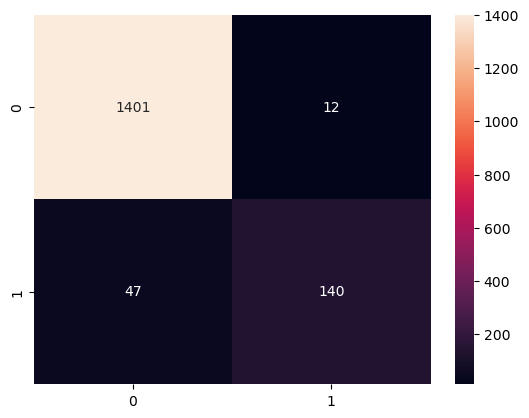

In [29]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

This code generates a heatmap of the confusion matrix between the actual class labels of the test set (y_test) and the predicted class labels generated by the model (y_pred).

A confusion matrix is a table used to evaluate the performance of a binary classification model, showing the number of true positive (TP), false positive (FP), false negative (FN), and true negative (TN) predictions. The matrix is used to calculate various metrics such as precision, recall, and F1-score, which provide different ways of understanding the trade-off between the model's ability to detect positive cases and its tendency to produce false alarms.

The sns.heatmap function is part of the seaborn library and creates a graphical representation of the confusion matrix, with each cell color-coded to indicate the number of true positive, false positive, false negative, or true negative predictions. The annot argument specifies that the actual count values should be displayed within each cell, and the fmt argument specifies the format (in this case, 'd' for integer values).

In [30]:
confusion_matrix(y_test,y_pred)

array([[1401,   12],
       [  47,  140]], dtype=int64)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1413
           1       0.92      0.75      0.83       187

    accuracy                           0.96      1600
   macro avg       0.94      0.87      0.90      1600
weighted avg       0.96      0.96      0.96      1600



This code calculates the classification report of the model's predictions and actual values in the test dataset. The classification_report function from the scikit-learn library takes in two arguments, the actual values in the test dataset y_test and the model's predictions y_pred. It returns the precision, recall, f1-score and support values for each class in the target variable. The report helps to evaluate the model's performance, with the precision indicating the proportion of correctly predicted positive instances out of all positive predictions, recall indicating the proportion of correctly predicted positive instances out of all actual positive instances, and the f1-score representing the harmonic mean of precision and recall.

***

In [39]:
def train_model(algorithm, params, X_train, X_test, y_train, y_test):
    
    model_to_find_params = GridSearchCV(algorithm(), params, scoring='r2', cv=3, verbose=3)

    %time model_to_find_params.fit(X_train, y_train)

    print(f'\nAccuracy of training set is {model_to_find_params.score(X_train,y_train)}\n')
    
    best_params = model_to_find_params.best_params_
    
    print(f"\nBest Parameters are {best_params}\n")
    
    global model
    model = algorithm(**best_params)
    
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    print(f"Accuracy of testing set is {accuracy_score(y_test,y_pred)}\n")
    
    print(f"\n {classification_report(y_test,y_pred)}")
    
    sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

### Decision Tree Classifier

The 'decisions_params' dictionary contains hyperparameters and their corresponding values to be tuned during the grid search for the Decision Tree Classifier algorithm. Here are short explanations of the parameters:

* 'criterion': The function to measure the quality of a split.
* 'splitter': The strategy used to choose the split at each node.
* 'max_depth': The maximum depth of the decision tree.
* 'min_samples_split': The minimum number of samples required to split an internal node.
* 'min_samples_leaf': The minimum number of samples required to be at a leaf node.
* 'max_features': The number of features to consider when looking for the best split.

In [37]:
decisions_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

This code trains a decision tree classifier model on the training data using the grid search method to find the best hyperparameters. The model is then evaluated on the test set for accuracy and classification report.

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
[CV 1/3] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.055 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.128 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.291 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.212 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.165 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.287 total time=   0.0s
[CV 1/3] END cr

[CV 1/3] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.205 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-0.123 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.203 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.258 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.151 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.165 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_le

[CV 1/3] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.036 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.012 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-0.002 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.156 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.333 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.301 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=None, max_features=log2, min_samples_le

[CV 2/3] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.515 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.436 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.289 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.268 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.138 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.546 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1

[CV 1/3] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=-0.127 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=-0.128 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=-0.128 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=-0.127 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=-0.128 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=-0.128 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_s

[CV 2/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=-0.128 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=-0.128 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=-0.127 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=-0.128 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.133 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=-0.048 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_sp

[CV 2/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=-0.128 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=-0.128 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=-0.127 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=-0.128 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=-0.128 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=-0.127 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_s

[CV 2/3] END criterion=gini, max_depth=2, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.184 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.133 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.004 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=-0.114 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=-0.128 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-0.099 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples

[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.228 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-0.123 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.170 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.025 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.030 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.035 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_spli

[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.128 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.128 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.139 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=-0.184 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=-0.203 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=-0.109 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_sp

[CV 2/3] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.529 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.553 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.275 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.110 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.198 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.607 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_sp

[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.200 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.333 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.147 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=-0.099 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=-0.095 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.091 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_sample

[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=-0.025 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.133 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.004 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.035 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.030 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=-0.202 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_s

[CV 2/3] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=-0.007 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.166 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.111 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=-0.081 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.086 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.106 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_sampl

[CV 3/3] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.478 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.453 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.455 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.399 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.237 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.133 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samp

[CV 1/3] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.301 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.282 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.342 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=-0.085 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.301 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.082 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samp

[CV 3/3] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.194 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.060 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=-0.342 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=-0.254 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.317 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.119 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=1, min_samp

[CV 3/3] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.445 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.317 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.296 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.333 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.584 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.483 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=1, min_sample

[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.245 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.147 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=-0.399 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=-0.142 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=-0.151 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.163 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=

[CV 3/3] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=-0.147 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.331 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=-0.002 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.268 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=-0.291 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=-0.128 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=None, max_features

[CV 2/3] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.161 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.231 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=-0.249 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=-0.398 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=-0.058 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.247 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=None, max_features

[CV 2/3] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.408 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.282 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.570 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.566 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.520 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.387 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=None, max_features

[CV 3/3] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.124 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=-0.127 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=-0.128 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=-0.128 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=-0.127 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=-0.128 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=auto, min_samples_l

[CV 2/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=-0.128 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.100 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=-0.127 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=-0.128 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=-0.128 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-0.127 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=log2, min_samp

[CV 2/3] END criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.138 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.124 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.060 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.068 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.044 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.266 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=None, min_samples_leaf=

[CV 1/3] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.415 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=-0.091 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.152 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=-0.141 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=-0.128 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=-0.128 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=auto, min_samp

[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=-0.071 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.357 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.021 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=-0.146 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=-0.063 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=-0.128 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samp

[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.184 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=-0.128 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=-0.043 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=-0.151 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=-0.142 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.139 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_l

[CV 3/3] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.511 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.135 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.268 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.184 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.579 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.566 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf

[CV 2/3] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.217 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.250 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.008 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.231 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=-0.086 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.331 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=10, max_features=auto, min_s

[CV 1/3] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=-0.123 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=-0.109 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.231 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.261 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.212 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.357 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=10, max_features=sqrt, min_sampl

[CV 2/3] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.007 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=-0.030 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.350 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.250 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.077 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=-0.170 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=10, max_features=log2, min_s

[CV 1/3] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.542 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.566 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.483 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.298 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.464 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.329 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=20, max_features=auto, min_s

[CV 2/3] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.240 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.245 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=-0.277 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=-0.221 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=-0.049 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.284 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=sqrt, min_sam

[CV 3/3] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=-0.128 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.233 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.128 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.194 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=-0.034 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=-0.165 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=20, max_features=log2, min

[CV 3/3] END criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.520 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.345 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.385 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.301 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.560 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.534 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=20, max_features=None, min_sam

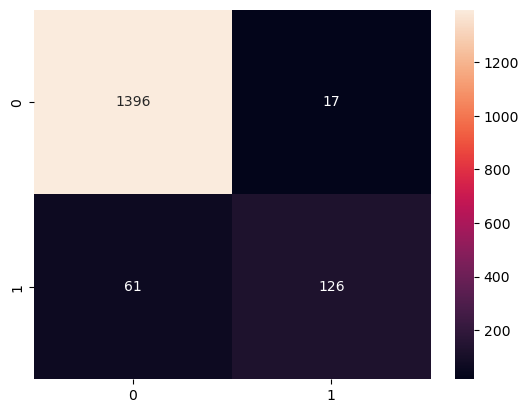

In [41]:
train_model(DecisionTreeClassifier,decisions_params, X_train, X_test,y_train,y_test)

***

### Random Forest

Here are short explanations of the parameters in the 'random_params' dictionary:

* 'n_estimators': The number of decision trees to be used in the Random Forest Classifier algorithm.
* 'max_depth': The maximum depth of the decision trees.
* 'min_samples_split': The minimum number of samples required to split an internal node.
* 'min_samples_leaf': The minimum number of samples required to be at a leaf node.
* 'max_features': The number of features to consider when looking for the best split.

In [42]:
random_params = {
    'n_estimators': [25,50,75,100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

This line of code calls the 'train_model' function, passing the Random Forest Classifier algorithm, the 'random_params' dictionary containing the hyperparameters to be tuned, and the training and testing datasets. The function performs the following steps:

* Performs a Grid Search with 3-fold cross-validation to find the best hyperparameters combination.
* Fits the training data to the model with the best hyperparameters.
* Predicts the test data using the trained model.
* Calculates the accuracy score of the predicted values.
* Prints a classification report.
* Plots a confusion matrix.

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.542 total time=   0.2s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.534 total time=   0.2s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.506 total time=   0.2s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.574 total time=   0.5s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.473 total time=   0.5s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.450 total time=   0.5s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, sc

[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.473 total time=   1.1s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=25;, score=0.570 total time=   0.2s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=25;, score=0.501 total time=   0.2s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=25;, score=0.483 total time=   0.2s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.579 total time=   0.5s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.511 total time=   0.5s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.455 total time=   0.5s
[CV 1/3] END max_depth=None

[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.483 total time=   1.1s
[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=25;, score=0.551 total time=   0.2s
[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=25;, score=0.497 total time=   0.2s
[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=25;, score=0.501 total time=   0.2s
[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.546 total time=   0.5s
[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.525 total time=   0.5s
[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.469 total time=   0.5s
[CV 1/3] END max_depth=None, max_

[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.469 total time=   1.0s
[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25;, score=0.551 total time=   0.2s
[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25;, score=0.487 total time=   0.2s
[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25;, score=0.422 total time=   0.2s
[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.570 total time=   0.4s
[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.473 total time=   0.4s
[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.427 total time=   0.5s
[CV 1/3] END max_depth=None, max

[CV 3/3] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.478 total time=   1.0s
[CV 1/3] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=25;, score=0.528 total time=   0.2s
[CV 2/3] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=25;, score=0.520 total time=   0.2s
[CV 3/3] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=25;, score=0.459 total time=   0.2s
[CV 1/3] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.560 total time=   0.4s
[CV 2/3] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.464 total time=   0.4s
[CV 3/3] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.459 total time=   0.4s
[CV 1/3] END max_depth=None

[CV 3/3] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.450 total time=   0.9s
[CV 1/3] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=25;, score=0.509 total time=   0.2s
[CV 2/3] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=25;, score=0.483 total time=   0.2s
[CV 3/3] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=25;, score=0.464 total time=   0.2s
[CV 1/3] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.551 total time=   0.4s
[CV 2/3] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.511 total time=   0.4s
[CV 3/3] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.436 total time=   0.4s
[CV 1/3] END max_depth=None, max_

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.445 total time=   0.9s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.513 total time=   0.2s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.483 total time=   0.2s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.473 total time=   0.2s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.556 total time=   0.4s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.492 total time=   0.4s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.450 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=auto, 

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=25;, score=0.560 total time=   0.2s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=25;, score=0.483 total time=   0.2s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=25;, score=0.441 total time=   0.2s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.495 total time=   0.4s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.469 total time=   0.4s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.427 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=75;, score=0.560 total time=   0.6s
[CV 2/3] END max_depth=10, max_features=a

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=25;, score=0.532 total time=   0.2s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=25;, score=0.445 total time=   0.2s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=25;, score=0.553 total time=   0.2s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.537 total time=   0.4s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.497 total time=   0.4s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.450 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=0.546 total time=   0.7s
[CV 2/3] END max_depth=10, max_features=sqrt, mi

[CV 1/3] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.570 total time=   0.2s
[CV 2/3] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.506 total time=   0.2s
[CV 3/3] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.450 total time=   0.2s
[CV 1/3] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.542 total time=   0.4s
[CV 2/3] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.487 total time=   0.5s
[CV 3/3] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.473 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=0.546 total time=   0.7s
[CV 2/3] END max_depth=10, max_features=log2, mi

[CV 2/3] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=25;, score=0.478 total time=   0.2s
[CV 3/3] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=25;, score=0.450 total time=   0.2s
[CV 1/3] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.513 total time=   0.5s
[CV 2/3] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.506 total time=   0.4s
[CV 3/3] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.450 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.513 total time=   0.7s
[CV 2/3] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.483 total time=   0.6s
[CV 3/3] END max_depth=10, max_features=l

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=25;, score=0.576 total time=   0.2s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=25;, score=0.478 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.570 total time=   0.5s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.487 total time=   0.4s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.464 total time=   0.5s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=0.546 total time=   0.7s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=0.506 total time=   0.7s
[CV 3/3] END max_depth=20, max_features=auto, mi

[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=25;, score=0.478 total time=   0.2s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=25;, score=0.459 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.560 total time=   0.5s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.511 total time=   0.4s
[CV 3/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.464 total time=   0.4s
[CV 1/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.560 total time=   0.7s
[CV 2/3] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.511 total time=   0.7s
[CV 3/3] END max_depth=20, max_features=auto, mi

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=25;, score=0.501 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.509 total time=   0.5s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.529 total time=   0.5s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.483 total time=   0.5s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=75;, score=0.560 total time=   0.7s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=75;, score=0.511 total time=   0.7s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=75;, score=0.487 total time=   0.7s
[CV 1/3] END max_depth=20, max_features=s

[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=25;, score=0.427 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.565 total time=   0.4s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.450 total time=   0.4s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.459 total time=   0.4s
[CV 1/3] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.574 total time=   0.7s
[CV 2/3] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.478 total time=   0.7s
[CV 3/3] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.459 total time=   0.7s
[CV 1/3] END max_depth=20, max_features=sqrt, mi

[CV 3/3] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.450 total time=   0.2s
[CV 1/3] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.551 total time=   0.5s
[CV 2/3] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.543 total time=   0.4s
[CV 3/3] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.469 total time=   0.4s
[CV 1/3] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.565 total time=   0.7s
[CV 2/3] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.501 total time=   0.7s
[CV 3/3] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.478 total time=   0.7s
[CV 1/3] END max_depth=20, max_features=log2, mi

[CV 1/3] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.551 total time=   0.5s
[CV 2/3] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.473 total time=   0.5s
[CV 3/3] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.431 total time=   0.5s
[CV 1/3] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=75;, score=0.546 total time=   0.7s
[CV 2/3] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=75;, score=0.469 total time=   0.7s
[CV 3/3] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=75;, score=0.455 total time=   0.7s
[CV 1/3] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.518 total time=   1.0s
[CV 2/3] END max_depth=20, max_features=

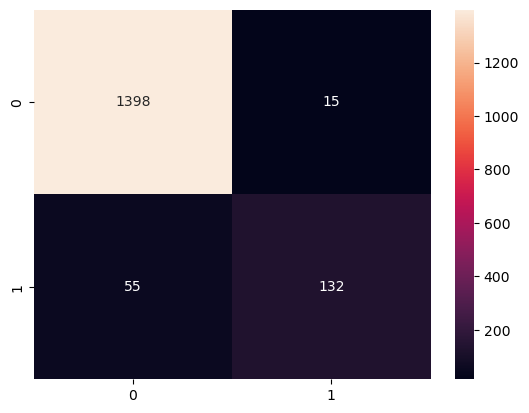

In [43]:
train_model(RandomForestClassifier,random_params, X_train, X_test,y_train,y_test)

***

### Support Vector Machine

* C: Regularization parameter. Controls the tradeoff between having a low training error and a low testing error.
* kernel: Type of kernel used for the SVM algorithm. Linear, RBF and sigmoid are the most commonly used kernels.
* degree: Degree of the polynomial kernel function (ignored by other kernels).
* shrinking: Whether to use the shrinking heuristic.
* class_weight: Balancing the classes by assigning weights. 'None' means equal weights to all classes, and 'balanced' mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.

In [46]:
support_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear','rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'shrinking': [True, False],
}

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV 1/3] END C=0.1, degree=2, kernel=linear, shrinking=True;, score=0.139 total time=   0.3s
[CV 2/3] END C=0.1, degree=2, kernel=linear, shrinking=True;, score=0.068 total time=   0.3s
[CV 3/3] END C=0.1, degree=2, kernel=linear, shrinking=True;, score=0.026 total time=   0.3s
[CV 1/3] END C=0.1, degree=2, kernel=linear, shrinking=False;, score=0.139 total time=   0.3s
[CV 2/3] END C=0.1, degree=2, kernel=linear, shrinking=False;, score=0.068 total time=   0.3s
[CV 3/3] END C=0.1, degree=2, kernel=linear, shrinking=False;, score=0.026 total time=   0.3s
[CV 1/3] END C=0.1, degree=2, kernel=rbf, shrinking=True;, score=-0.109 total time=   0.6s
[CV 2/3] END C=0.1, degree=2, kernel=rbf, shrinking=True;, score=-0.072 total time=   0.6s
[CV 3/3] END C=0.1, degree=2, kernel=rbf, shrinking=True;, score=-0.077 total time=   0.6s
[CV 1/3] END C=0.1, degree=2, kernel=rbf, shrinking=False;, score=-0.109 total time=   0.6s
[CV 2/3] END

[CV 2/3] END C=1, degree=2, kernel=sigmoid, shrinking=False;, score=-0.459 total time=   0.3s
[CV 3/3] END C=1, degree=2, kernel=sigmoid, shrinking=False;, score=-0.296 total time=   0.3s
[CV 1/3] END C=1, degree=3, kernel=linear, shrinking=True;, score=0.144 total time=   0.6s
[CV 2/3] END C=1, degree=3, kernel=linear, shrinking=True;, score=0.072 total time=   0.5s
[CV 3/3] END C=1, degree=3, kernel=linear, shrinking=True;, score=0.030 total time=   0.5s
[CV 1/3] END C=1, degree=3, kernel=linear, shrinking=False;, score=0.144 total time=   1.3s
[CV 2/3] END C=1, degree=3, kernel=linear, shrinking=False;, score=0.072 total time=   0.9s
[CV 3/3] END C=1, degree=3, kernel=linear, shrinking=False;, score=0.030 total time=   1.3s
[CV 1/3] END C=1, degree=3, kernel=rbf, shrinking=True;, score=0.397 total time=   0.6s
[CV 2/3] END C=1, degree=3, kernel=rbf, shrinking=True;, score=0.375 total time=   0.5s
[CV 3/3] END C=1, degree=3, kernel=rbf, shrinking=True;, score=0.301 total time=   0.6s

[CV 2/3] END C=10, degree=3, kernel=sigmoid, shrinking=False;, score=-0.706 total time=   0.3s
[CV 3/3] END C=10, degree=3, kernel=sigmoid, shrinking=False;, score=-0.603 total time=   0.4s
[CV 1/3] END C=10, degree=4, kernel=linear, shrinking=True;, score=0.139 total time=   2.9s
[CV 2/3] END C=10, degree=4, kernel=linear, shrinking=True;, score=0.072 total time=   2.4s
[CV 3/3] END C=10, degree=4, kernel=linear, shrinking=True;, score=0.026 total time=   2.5s
[CV 1/3] END C=10, degree=4, kernel=linear, shrinking=False;, score=0.139 total time=  12.9s
[CV 2/3] END C=10, degree=4, kernel=linear, shrinking=False;, score=0.072 total time=  11.9s
[CV 3/3] END C=10, degree=4, kernel=linear, shrinking=False;, score=0.026 total time=  14.0s
[CV 1/3] END C=10, degree=4, kernel=rbf, shrinking=True;, score=0.373 total time=   0.7s
[CV 2/3] END C=10, degree=4, kernel=rbf, shrinking=True;, score=0.319 total time=   0.6s
[CV 3/3] END C=10, degree=4, kernel=rbf, shrinking=True;, score=0.319 total t

[CV 1/3] END C=100, degree=4, kernel=sigmoid, shrinking=False;, score=-0.614 total time=   0.3s
[CV 2/3] END C=100, degree=4, kernel=sigmoid, shrinking=False;, score=-0.785 total time=   0.2s
[CV 3/3] END C=100, degree=4, kernel=sigmoid, shrinking=False;, score=-0.659 total time=   0.3s
[CV 1/3] END C=100, degree=5, kernel=linear, shrinking=True;, score=0.139 total time=  18.2s
[CV 2/3] END C=100, degree=5, kernel=linear, shrinking=True;, score=0.072 total time=  16.8s
[CV 3/3] END C=100, degree=5, kernel=linear, shrinking=True;, score=0.026 total time=  17.5s
[CV 1/3] END C=100, degree=5, kernel=linear, shrinking=False;, score=0.139 total time= 2.3min
[CV 2/3] END C=100, degree=5, kernel=linear, shrinking=False;, score=0.072 total time= 2.1min
[CV 3/3] END C=100, degree=5, kernel=linear, shrinking=False;, score=0.026 total time= 2.3min
[CV 1/3] END C=100, degree=5, kernel=rbf, shrinking=True;, score=0.284 total time=   0.5s
[CV 2/3] END C=100, degree=5, kernel=rbf, shrinking=True;, sc

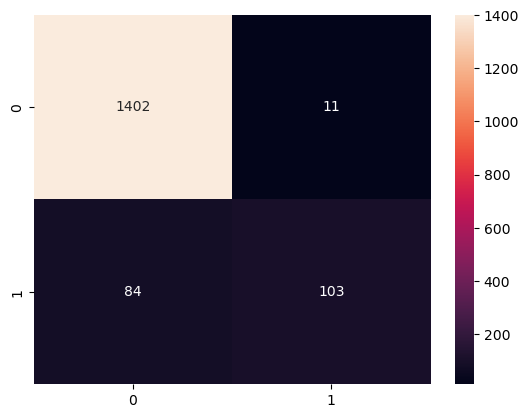

In [47]:
train_model(SVC,support_params, X_train, X_test,y_train,y_test)

***

### K Nearest Neighbors

neighbors_params is a dictionary containing hyperparameters and their values for K-Nearest Neighbors (KNN) classifier. The hyperparameters are:

* n_neighbors: number of neighbors to use for classification
* weights: weight function used in prediction. ‘uniform’ means all points in each neighborhood are weighted equally, whereas ‘distance’ weights points by the inverse of their distance.
* algorithm: algorithm used to compute nearest neighbors. {'ball_tree', 'kd_tree', 'brute', 'auto'}
* leaf_size: leaf size passed to BallTree or KDTree.
* p: power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance is used.
* metric: the distance metric used to calculate the distance between two points. Possible values are 'euclidean' and 'manhattan'.

In [48]:
neighbors_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']
}

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
[CV 1/3] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=-0.109 total time=   0.3s
[CV 2/3] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=-0.002 total time=   0.3s
[CV 3/3] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=-0.058 total time=   0.3s
[CV 1/3] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=-0.212 total time=   0.2s
[CV 2/3] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=-0.133 total time=   0.2s
[CV 3/3] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=-0.147 total time=   0.2s
[CV 1/3] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=-0.109 

[CV 1/3] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform;, score=-0.062 total time=   0.3s
[CV 2/3] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform;, score=-0.081 total time=   0.3s
[CV 3/3] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform;, score=-0.030 total time=   0.3s
[CV 1/3] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=distance;, score=-0.385 total time=   0.2s
[CV 2/3] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=distance;, score=-0.426 total time=   0.2s
[CV 3/3] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=distance;, score=-0.305 total time=   0.2s
[CV 1/3] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=-0.062 total time=   0.3s
[CV 2/3] END algorithm=ball_tree, leaf_size=1

[CV 2/3] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=-0.002 total time=   0.3s
[CV 3/3] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=-0.058 total time=   0.3s
[CV 1/3] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=-0.212 total time=   0.2s
[CV 2/3] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=-0.133 total time=   0.2s
[CV 3/3] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=-0.147 total time=   0.2s
[CV 1/3] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=-0.109 total time=   0.3s
[CV 2/3] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=-0.002 total time=   0.3s
[CV 3/3] END algorithm=ball_tree, leaf_size=2

[CV 3/3] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=3, p=1, weights=uniform;, score=-0.030 total time=   0.3s
[CV 1/3] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=3, p=1, weights=distance;, score=-0.385 total time=   0.2s
[CV 2/3] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=3, p=1, weights=distance;, score=-0.426 total time=   0.2s
[CV 3/3] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=3, p=1, weights=distance;, score=-0.305 total time=   0.2s
[CV 1/3] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=-0.062 total time=   0.3s
[CV 2/3] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=-0.081 total time=   0.3s
[CV 3/3] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=-0.030 total time=   0.3s
[CV 1/3] END algorithm=ball_tree, leaf_size=2

[CV 1/3] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=-0.212 total time=   0.2s
[CV 2/3] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=-0.133 total time=   0.2s
[CV 3/3] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=-0.147 total time=   0.2s
[CV 1/3] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=-0.109 total time=   0.3s
[CV 2/3] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=-0.002 total time=   0.3s
[CV 3/3] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=-0.058 total time=   0.2s
[CV 1/3] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=-0.212 total time=   0.2s
[CV 2/3] END algorithm=ball_tree, leaf_size=

[CV 2/3] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, p=1, weights=distance;, score=-0.426 total time=   0.2s
[CV 3/3] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, p=1, weights=distance;, score=-0.305 total time=   0.2s
[CV 1/3] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=-0.062 total time=   0.3s
[CV 2/3] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=-0.081 total time=   0.3s
[CV 3/3] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=-0.030 total time=   0.3s
[CV 1/3] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=-0.385 total time=   0.2s
[CV 2/3] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=-0.426 total time=   0.2s
[CV 3/3] END algorithm=ball_tree, leaf_size=

[CV 3/3] END algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=-0.147 total time=   0.2s
[CV 1/3] END algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=-0.109 total time=   0.3s
[CV 2/3] END algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=-0.002 total time=   0.2s
[CV 3/3] END algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=-0.058 total time=   0.3s
[CV 1/3] END algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=-0.212 total time=   0.1s
[CV 2/3] END algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=-0.133 total time=   0.1s
[CV 3/3] END algorithm=ball_tree, leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=-0.147 total time=   0.1s
[CV 1/3] END algorithm=ball_tree, leaf_size=

[CV 1/3] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=-0.062 total time=   0.2s
[CV 2/3] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=-0.081 total time=   0.3s
[CV 3/3] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=-0.030 total time=   0.2s
[CV 1/3] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=-0.385 total time=   0.2s
[CV 2/3] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=-0.426 total time=   0.2s
[CV 3/3] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=-0.305 total time=   0.2s
[CV 1/3] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.004 total time=   0.2s
[CV 2/3] END algorithm=ball_tree, leaf_size=40

[CV 2/3] END algorithm=ball_tree, leaf_size=50, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=-0.002 total time=   0.3s
[CV 3/3] END algorithm=ball_tree, leaf_size=50, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=-0.058 total time=   0.2s
[CV 1/3] END algorithm=ball_tree, leaf_size=50, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=-0.212 total time=   0.1s
[CV 2/3] END algorithm=ball_tree, leaf_size=50, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=-0.133 total time=   0.1s
[CV 3/3] END algorithm=ball_tree, leaf_size=50, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=-0.147 total time=   0.2s
[CV 1/3] END algorithm=ball_tree, leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.036 total time=   0.2s
[CV 2/3] END algorithm=ball_tree, leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.072 total time=   0.2s
[CV 3/3] END algorithm=ball_tree, leaf_size=50,

[CV 3/3] END algorithm=ball_tree, leaf_size=50, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=-0.030 total time=   0.2s
[CV 1/3] END algorithm=ball_tree, leaf_size=50, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=-0.385 total time=   0.2s
[CV 2/3] END algorithm=ball_tree, leaf_size=50, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=-0.426 total time=   0.2s
[CV 3/3] END algorithm=ball_tree, leaf_size=50, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=-0.305 total time=   0.2s
[CV 1/3] END algorithm=ball_tree, leaf_size=50, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.004 total time=   0.2s
[CV 2/3] END algorithm=ball_tree, leaf_size=50, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.007 total time=   0.3s
[CV 3/3] END algorithm=ball_tree, leaf_size=50, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.082 total time=   0.2s
[CV 1/3] END algorithm=ball_tree, leaf_size=50, 

[CV 1/3] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=-0.212 total time=   0.5s
[CV 2/3] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=-0.133 total time=   0.4s
[CV 3/3] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=-0.147 total time=   0.4s
[CV 1/3] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.036 total time=   0.5s
[CV 2/3] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.072 total time=   0.6s
[CV 3/3] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.072 total time=   0.6s
[CV 1/3] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=distance;, score=-0.085 total time=   0.5s
[CV 2/3] END algorithm=kd_tree, leaf_size=10, metric=euclidea

[CV 3/3] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=-0.305 total time=   0.3s
[CV 1/3] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.004 total time=   0.4s
[CV 2/3] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.007 total time=   0.4s
[CV 3/3] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.082 total time=   0.4s
[CV 1/3] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=5, p=1, weights=distance;, score=-0.272 total time=   0.3s
[CV 2/3] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=5, p=1, weights=distance;, score=-0.296 total time=   0.3s
[CV 3/3] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=5, p=1, weights=distance;, score=-0.128 total time=   0.3s
[CV 1/3] END algorithm=kd_tree, leaf_size=10, metric=manhatta

[CV 1/3] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.036 total time=   0.4s
[CV 2/3] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.072 total time=   0.4s
[CV 3/3] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.072 total time=   0.4s
[CV 1/3] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=distance;, score=-0.085 total time=   0.3s
[CV 2/3] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=distance;, score=-0.058 total time=   0.3s
[CV 3/3] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=1, weights=distance;, score=-0.007 total time=   0.3s
[CV 1/3] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.036 total time=   0.4s
[CV 2/3] END algorithm=kd_tree, leaf_size=20, metric=euclidean,

[CV 3/3] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.082 total time=   0.3s
[CV 1/3] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance;, score=-0.272 total time=   0.2s
[CV 2/3] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance;, score=-0.296 total time=   0.2s
[CV 3/3] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=1, weights=distance;, score=-0.128 total time=   0.2s
[CV 1/3] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.004 total time=   0.3s
[CV 2/3] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.007 total time=   0.3s
[CV 3/3] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.082 total time=   0.3s
[CV 1/3] END algorithm=kd_tree, leaf_size=20, metric=manhattan,

[CV 2/3] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=distance;, score=-0.058 total time=   0.4s
[CV 3/3] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=5, p=1, weights=distance;, score=-0.007 total time=   0.4s
[CV 1/3] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.036 total time=   0.5s
[CV 2/3] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.072 total time=   0.5s
[CV 3/3] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.072 total time=   0.5s
[CV 1/3] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=-0.085 total time=   0.4s
[CV 2/3] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=-0.058 total time=   0.4s
[CV 3/3] END algorithm=kd_tree, leaf_size=30, metric=euclidea

[CV 1/3] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.004 total time=   0.4s
[CV 2/3] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.007 total time=   0.3s
[CV 3/3] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.082 total time=   0.3s
[CV 1/3] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=-0.272 total time=   0.2s
[CV 2/3] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=-0.296 total time=   0.2s
[CV 3/3] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=-0.128 total time=   0.2s
[CV 1/3] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=0.032 total time=   0.3s
[CV 2/3] END algorithm=kd_tree, leaf_size=30, metric=manhattan,

[CV 3/3] END algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.072 total time=   0.3s
[CV 1/3] END algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=-0.085 total time=   0.2s
[CV 2/3] END algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=-0.058 total time=   0.3s
[CV 3/3] END algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=-0.007 total time=   0.3s
[CV 1/3] END algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=uniform;, score=0.097 total time=   0.3s
[CV 2/3] END algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=uniform;, score=0.105 total time=   0.4s
[CV 3/3] END algorithm=kd_tree, leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=uniform;, score=0.100 total time=   0.4s
[CV 1/3] END algorithm=kd_tree, leaf_size=40, metric=euclidean,

[CV 2/3] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=-0.296 total time=   0.3s
[CV 3/3] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=-0.128 total time=   0.2s
[CV 1/3] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=0.032 total time=   0.3s
[CV 2/3] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=0.077 total time=   0.3s
[CV 3/3] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=0.054 total time=   0.3s
[CV 1/3] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=-0.184 total time=   0.2s
[CV 2/3] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=-0.207 total time=   0.2s
[CV 3/3] END algorithm=kd_tree, leaf_size=40, metric=manhatta

[CV 3/3] END algorithm=kd_tree, leaf_size=50, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=-0.007 total time=   0.2s
[CV 1/3] END algorithm=kd_tree, leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=uniform;, score=0.097 total time=   0.3s
[CV 2/3] END algorithm=kd_tree, leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=uniform;, score=0.105 total time=   0.3s
[CV 3/3] END algorithm=kd_tree, leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=uniform;, score=0.100 total time=   0.3s
[CV 1/3] END algorithm=kd_tree, leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=0.013 total time=   0.2s
[CV 2/3] END algorithm=kd_tree, leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=-0.007 total time=   0.2s
[CV 3/3] END algorithm=kd_tree, leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=0.049 total time=   0.2s
[CV 1/3] END algorithm=kd_tree, leaf_size=50, metric=euclidean,

[CV 2/3] END algorithm=kd_tree, leaf_size=50, metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=0.077 total time=   0.3s
[CV 3/3] END algorithm=kd_tree, leaf_size=50, metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=0.054 total time=   0.3s
[CV 1/3] END algorithm=kd_tree, leaf_size=50, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=-0.184 total time=   0.2s
[CV 2/3] END algorithm=kd_tree, leaf_size=50, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=-0.207 total time=   0.2s
[CV 3/3] END algorithm=kd_tree, leaf_size=50, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=-0.095 total time=   0.2s
[CV 1/3] END algorithm=kd_tree, leaf_size=50, metric=manhattan, n_neighbors=7, p=2, weights=uniform;, score=0.032 total time=   0.3s
[CV 2/3] END algorithm=kd_tree, leaf_size=50, metric=manhattan, n_neighbors=7, p=2, weights=uniform;, score=0.077 total time=   0.3s
[CV 3/3] END algorithm=kd_tree, leaf_size=50, metric=manhattan,

[CV 1/3] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=0.013 total time=   0.0s
[CV 2/3] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=-0.007 total time=   0.0s
[CV 3/3] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=0.049 total time=   0.0s
[CV 1/3] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=7, p=2, weights=uniform;, score=0.097 total time=   0.1s
[CV 2/3] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=7, p=2, weights=uniform;, score=0.105 total time=   0.1s
[CV 3/3] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=7, p=2, weights=uniform;, score=0.100 total time=   0.1s
[CV 1/3] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=0.013 total time=   0.0s
[CV 2/3] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=7, p

[CV 1/3] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=7, p=2, weights=uniform;, score=0.032 total time=   0.2s
[CV 2/3] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=7, p=2, weights=uniform;, score=0.077 total time=   0.1s
[CV 3/3] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=7, p=2, weights=uniform;, score=0.054 total time=   0.1s
[CV 1/3] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=7, p=2, weights=distance;, score=-0.184 total time=   0.0s
[CV 2/3] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=7, p=2, weights=distance;, score=-0.207 total time=   0.0s
[CV 3/3] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=7, p=2, weights=distance;, score=-0.095 total time=   0.0s
[CV 1/3] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.041 total time=   0.2s
[CV 2/3] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=9, 

[CV 3/3] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=7, p=2, weights=uniform;, score=0.100 total time=   0.1s
[CV 1/3] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=0.013 total time=   0.0s
[CV 2/3] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=-0.007 total time=   0.0s
[CV 3/3] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=0.049 total time=   0.0s
[CV 1/3] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.120 total time=   0.1s
[CV 2/3] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.138 total time=   0.1s
[CV 3/3] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.058 total time=   0.1s
[CV 1/3] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=9, p=

[CV 1/3] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.041 total time=   0.2s
[CV 2/3] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.105 total time=94.4min
[CV 3/3] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.096 total time=   1.7s
[CV 1/3] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=9, p=1, weights=distance;, score=-0.160 total time=   1.2s
[CV 2/3] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=9, p=1, weights=distance;, score=-0.128 total time=   0.3s
[CV 3/3] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=9, p=1, weights=distance;, score=-0.049 total time=   0.2s
[CV 1/3] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=0.041 total time=   0.2s
[CV 2/3] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=9, 

[CV 3/3] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.058 total time=   0.1s
[CV 1/3] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.032 total time=   0.0s
[CV 2/3] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.058 total time=   0.0s
[CV 3/3] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.012 total time=   0.0s
[CV 1/3] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=9, p=2, weights=uniform;, score=0.120 total time=   0.1s
[CV 2/3] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=9, p=2, weights=uniform;, score=0.138 total time=   0.1s
[CV 3/3] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=9, p=2, weights=uniform;, score=0.058 total time=   0.1s
[CV 1/3] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=9, p=2

[CV 1/3] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=0.041 total time=   0.2s
[CV 2/3] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=0.105 total time=   0.2s
[CV 3/3] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=0.096 total time=   0.2s
[CV 1/3] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=-0.160 total time=   0.0s
[CV 2/3] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=-0.128 total time=   0.1s
[CV 3/3] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=-0.049 total time=   0.1s
[CV 1/3] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=11, p=1, weights=uniform;, score=0.046 total time=   0.2s
[CV 2/3] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=11

[CV 3/3] END algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=9, p=2, weights=uniform;, score=0.058 total time=   0.1s
[CV 1/3] END algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.032 total time=   0.0s
[CV 2/3] END algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.058 total time=   0.0s
[CV 3/3] END algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.012 total time=   0.0s
[CV 1/3] END algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=uniform;, score=0.139 total time=   0.1s
[CV 2/3] END algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=uniform;, score=0.096 total time=   0.2s
[CV 3/3] END algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=uniform;, score=0.063 total time=   0.1s
[CV 1/3] END algorithm=brute, leaf_size=40, metric=euclidean, n_neighbors=11,

[CV 2/3] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=-0.128 total time=   0.0s
[CV 3/3] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=-0.049 total time=   0.1s
[CV 1/3] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=11, p=1, weights=uniform;, score=0.046 total time=   0.2s
[CV 2/3] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=11, p=1, weights=uniform;, score=0.091 total time=   0.2s
[CV 3/3] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=11, p=1, weights=uniform;, score=0.054 total time=   0.2s
[CV 1/3] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=11, p=1, weights=distance;, score=-0.151 total time=   0.0s
[CV 2/3] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=11, p=1, weights=distance;, score=-0.081 total time=   0.1s
[CV 3/3] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighb

[CV 1/3] END algorithm=brute, leaf_size=50, metric=euclidean, n_neighbors=11, p=1, weights=uniform;, score=0.139 total time=   0.1s
[CV 2/3] END algorithm=brute, leaf_size=50, metric=euclidean, n_neighbors=11, p=1, weights=uniform;, score=0.096 total time=   0.1s
[CV 3/3] END algorithm=brute, leaf_size=50, metric=euclidean, n_neighbors=11, p=1, weights=uniform;, score=0.063 total time=   0.1s
[CV 1/3] END algorithm=brute, leaf_size=50, metric=euclidean, n_neighbors=11, p=1, weights=distance;, score=0.050 total time=   0.0s
[CV 2/3] END algorithm=brute, leaf_size=50, metric=euclidean, n_neighbors=11, p=1, weights=distance;, score=0.026 total time=   0.0s
[CV 3/3] END algorithm=brute, leaf_size=50, metric=euclidean, n_neighbors=11, p=1, weights=distance;, score=0.040 total time=   0.1s
[CV 1/3] END algorithm=brute, leaf_size=50, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=0.139 total time=   0.1s
[CV 2/3] END algorithm=brute, leaf_size=50, metric=euclidean, n_neighbors

[CV 3/3] END algorithm=brute, leaf_size=50, metric=manhattan, n_neighbors=11, p=1, weights=uniform;, score=0.054 total time=   0.2s
[CV 1/3] END algorithm=brute, leaf_size=50, metric=manhattan, n_neighbors=11, p=1, weights=distance;, score=-0.151 total time=   0.0s
[CV 2/3] END algorithm=brute, leaf_size=50, metric=manhattan, n_neighbors=11, p=1, weights=distance;, score=-0.081 total time=   0.0s
[CV 3/3] END algorithm=brute, leaf_size=50, metric=manhattan, n_neighbors=11, p=1, weights=distance;, score=-0.058 total time=   0.1s
[CV 1/3] END algorithm=brute, leaf_size=50, metric=manhattan, n_neighbors=11, p=2, weights=uniform;, score=0.046 total time=   0.2s
[CV 2/3] END algorithm=brute, leaf_size=50, metric=manhattan, n_neighbors=11, p=2, weights=uniform;, score=0.091 total time=   0.2s
[CV 3/3] END algorithm=brute, leaf_size=50, metric=manhattan, n_neighbors=11, p=2, weights=uniform;, score=0.054 total time=   0.1s
[CV 1/3] END algorithm=brute, leaf_size=50, metric=manhattan, n_neighb

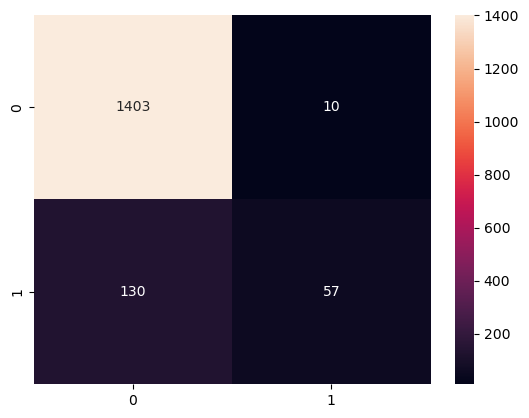

In [49]:
train_model(KNeighborsClassifier,neighbors_params, X_train, X_test,y_train,y_test)

***